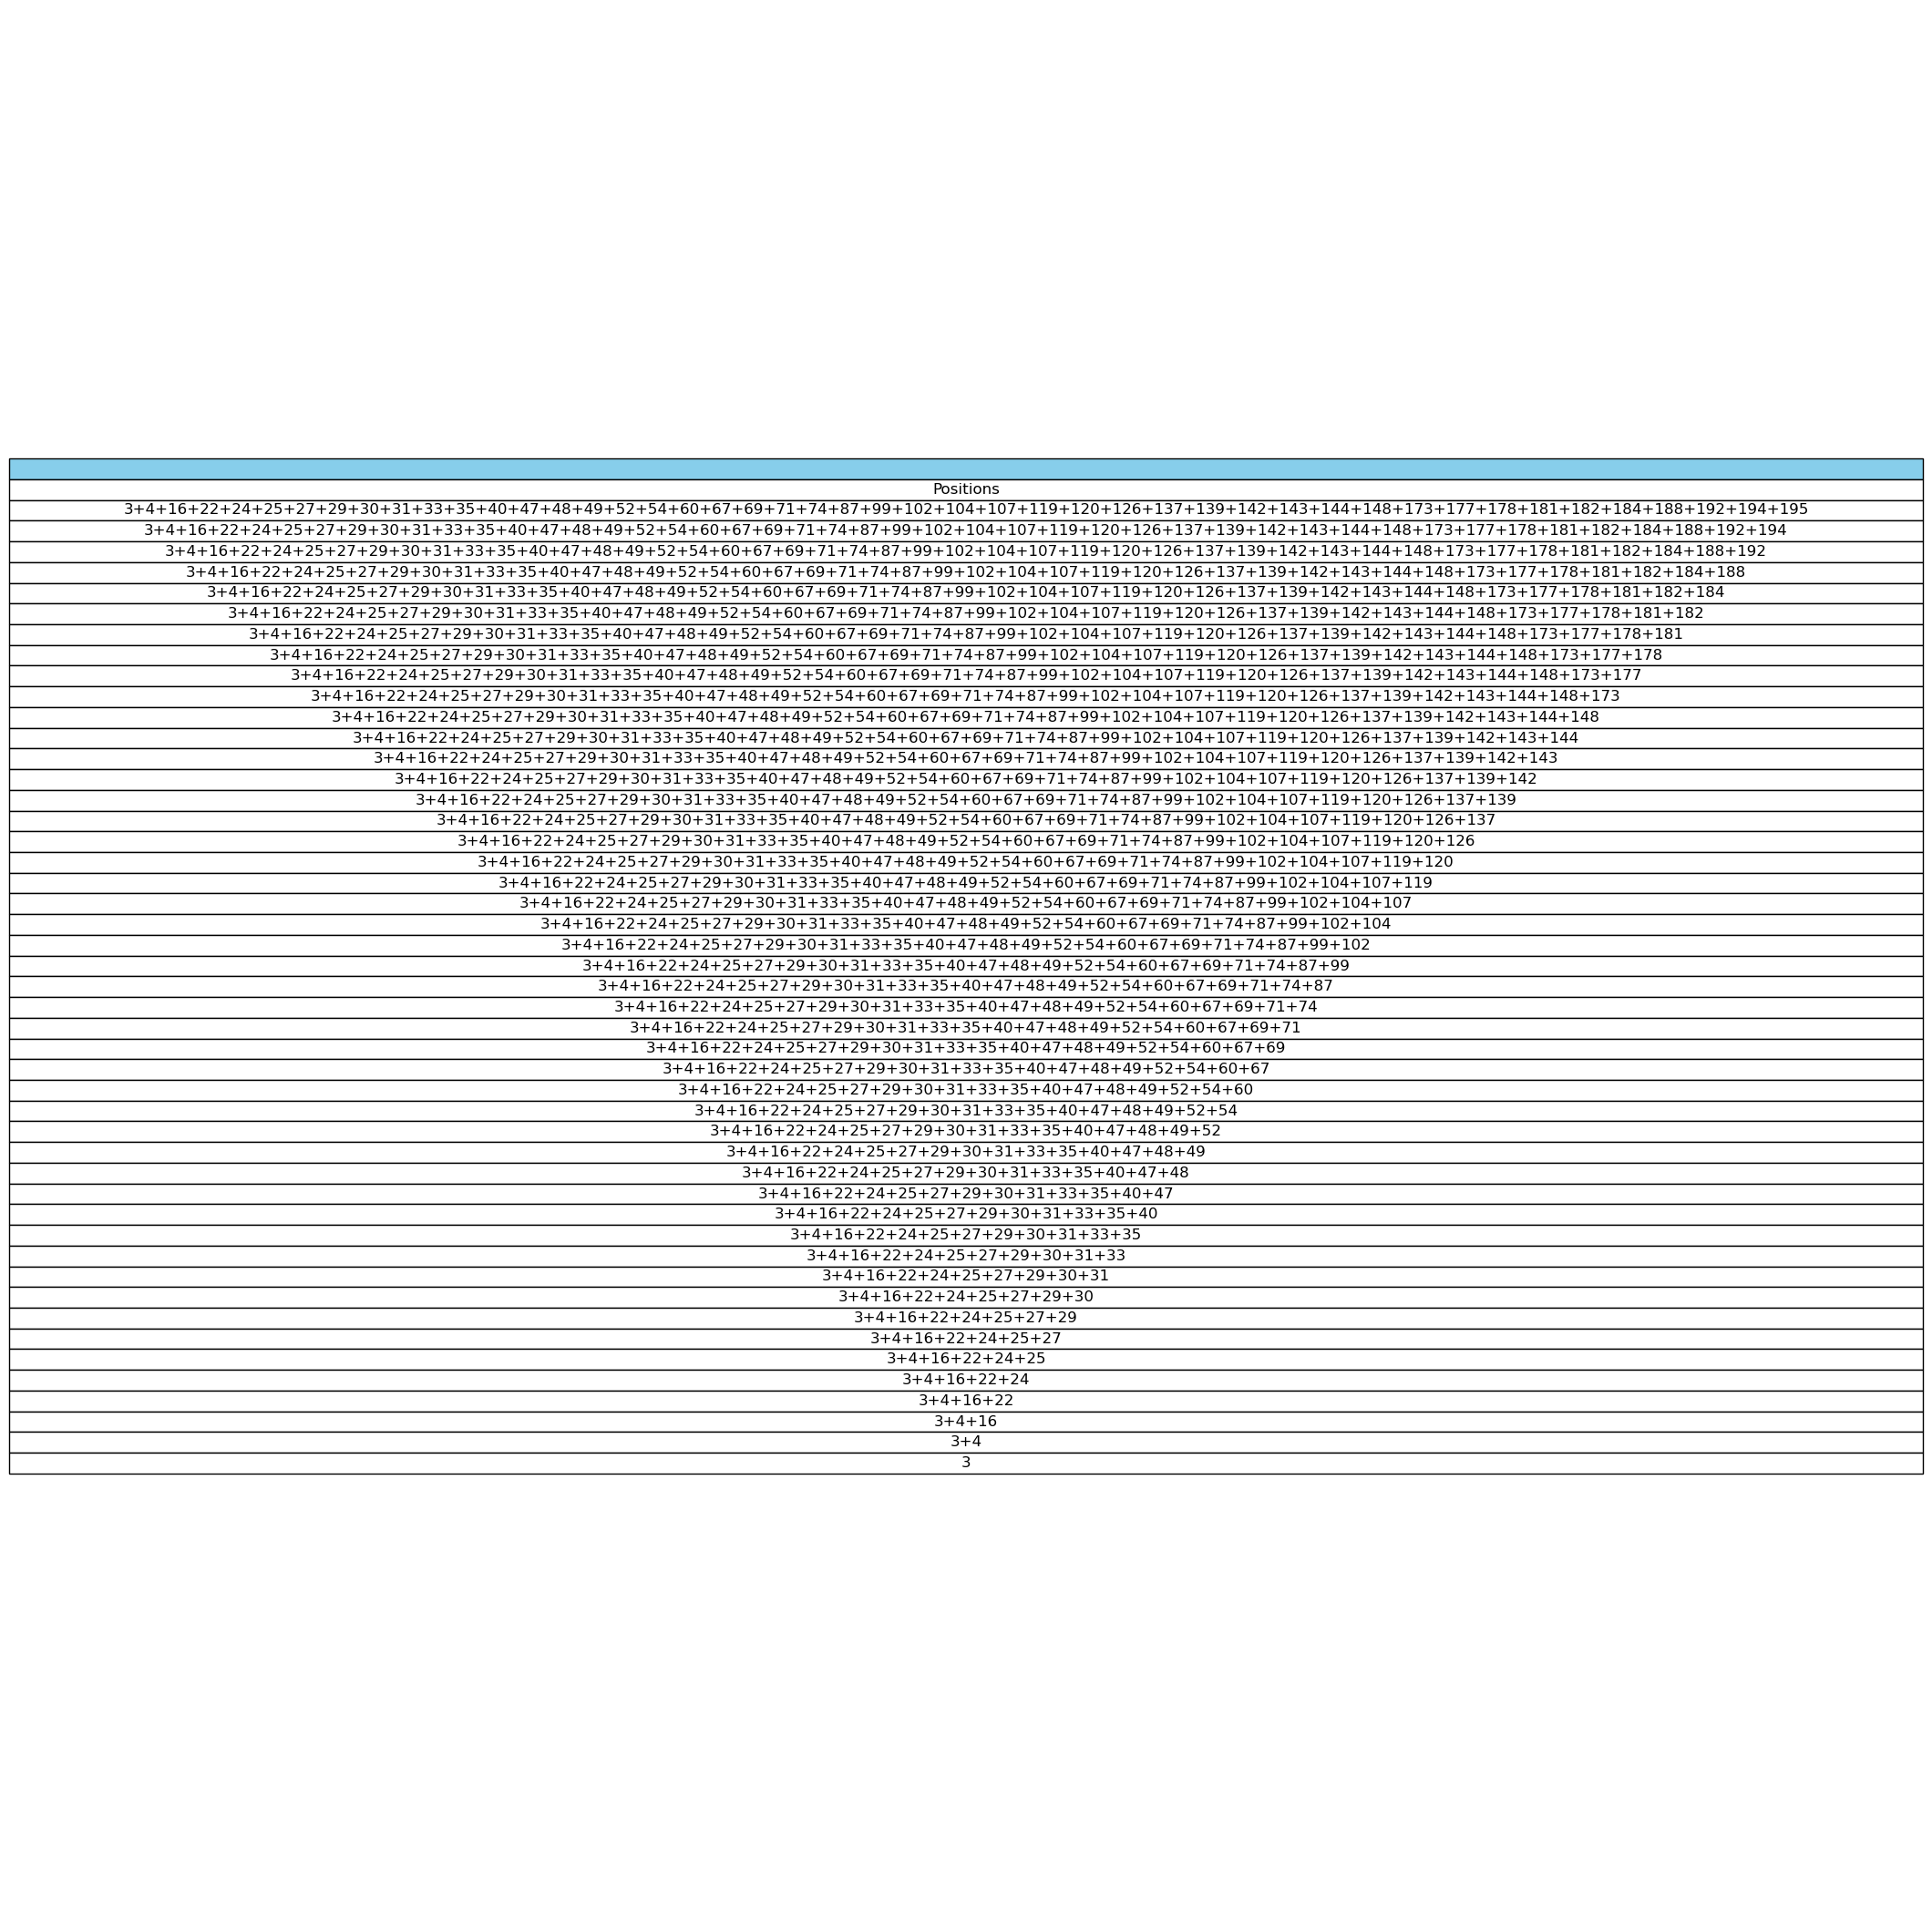

PNG visualization saved to /home/hp/results/mutant_combinations_positions_centered.png


In [14]:
import matplotlib.pyplot as plt

# Define the list of mutants with positions in descending order
mutants = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (49, 'U', 'C'), (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'),
    (69, 'G', 'N'), (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'),
    (102, 'S', 'G'), (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'),
    (126, 'T', 'S'), (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'),
    (144, 'Q', 'H'), (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'),
    (181, 'S', 'R'), (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'),
    (194, 'F', 'T'), (195, 'N', 'S')
]

# Generate the combinations in descending order
combinations = []
for i in range(len(mutants), 0, -1):
    combo = mutants[:i]
    positions = "+".join(str(mut[0]) for mut in combo)
    combinations.append(positions)

# Prepare data for plotting
positions = [combo for combo in combinations]

# Plot as a table in a figure with only the Positions column
fig, ax = plt.subplots(figsize=(15, 30))  # Adjust the figure size to reduce white space
ax.axis('off')
table_data = [["Positions"]] + [[pos] for pos in positions]
table = ax.table(cellText=table_data, cellLoc="center", loc="center", colColours=["skyblue"])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 1.5)  # Further scale to increase visibility

# Center the table within the figure
table_position = ax.get_position()
table_position = [table_position.x0 + 0.15, table_position.y0 + 0.15, 0.7, 0.7]  # Center the table
ax.set_position(table_position)

# Save as PNG
output_image = "/home/hp/results/mutant_combinations_positions_centered.png"
plt.savefig(output_image, dpi=100, bbox_inches="tight")
plt.show()

print(f"PNG visualization saved to {output_image}")
